In [1]:
import pandas as pd

# file downloaded from https://obis.org/data/access/ on 2022-07-10

file = "/Users/Mathew.Biddle/Desktop/obis_20220710.parquet"

This file is large, so we need to pre-subset the columns of interest. Then we can read it into memory.

In [2]:
columns = ['organismQuantity', 'organismQuantityType','decimalLatitude','decimalLongitude']

df = pd.read_parquet(file, engine="fastparquet", columns=columns)

Let's check the size of the monster:

In [3]:
df.shape

(105316746, 4)

Okay, let's filter out where `organismQuantityType` or `organismQuantity` don't have values. We need both to exist!

In [4]:
df_filtered = df[(df['organismQuantityType'].notna() | df['organismQuantity'].notna())]

df_filtered.shape

(27292364, 4)

Let's make a map of the points we have for some context.

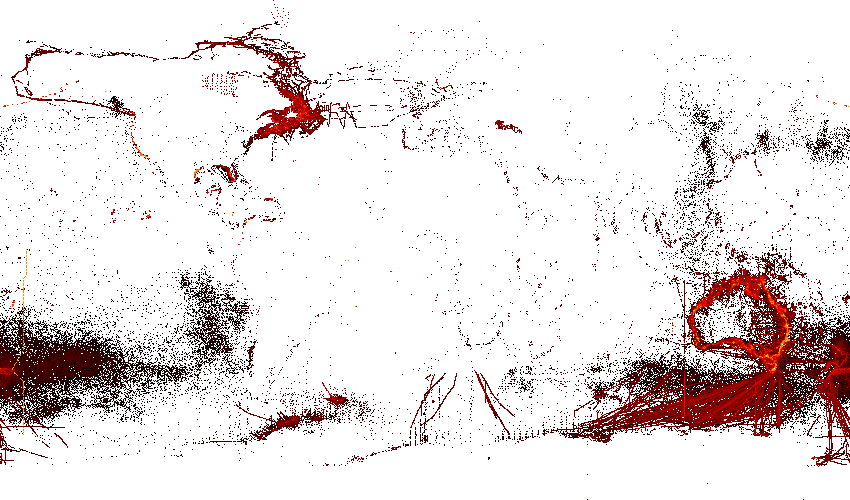

In [14]:
import datashader as ds
import colorcet
#df  = pd.read_csv('census.csv')
cvs = ds.Canvas(plot_width=850, plot_height=500)
agg = cvs.points(df_filtered, 'decimalLongitude', 'decimalLatitude')
img = ds.tf.set_background(ds.tf.shade(agg, cmap=colorcet.fire, how='log'), "white")

img

In [55]:
pd.set_option('display.max_rows', 160)
df_group = df.groupby(by='organismQuantityType').count()

df_group.drop(columns=['decimalLatitude','decimalLongitude'], inplace=True)

df_group.rename(columns={'organismQuantity':'count'}, inplace=True)

df_group.sort_values(by='count', ascending=False)

,count
organismQuantityType,
DNA sequence reads,17099687
individuals,4258861
detections per day,1510107
individual,533275
Relative Abundance,374608
Individuals,211118
number of individuals per 120 m3,153944
Cells per litre,132071
biomass in kilograms (kg),115079


<AxesSubplot:xlabel='organismQuantityType', ylabel='count'>

C:\Users\Mathew.Biddle\programs\Anaconda3\envs\globe\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 150 (\x96) missing from current font.
  func(*args, **kwargs)
C:\Users\Mathew.Biddle\programs\Anaconda3\envs\globe\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


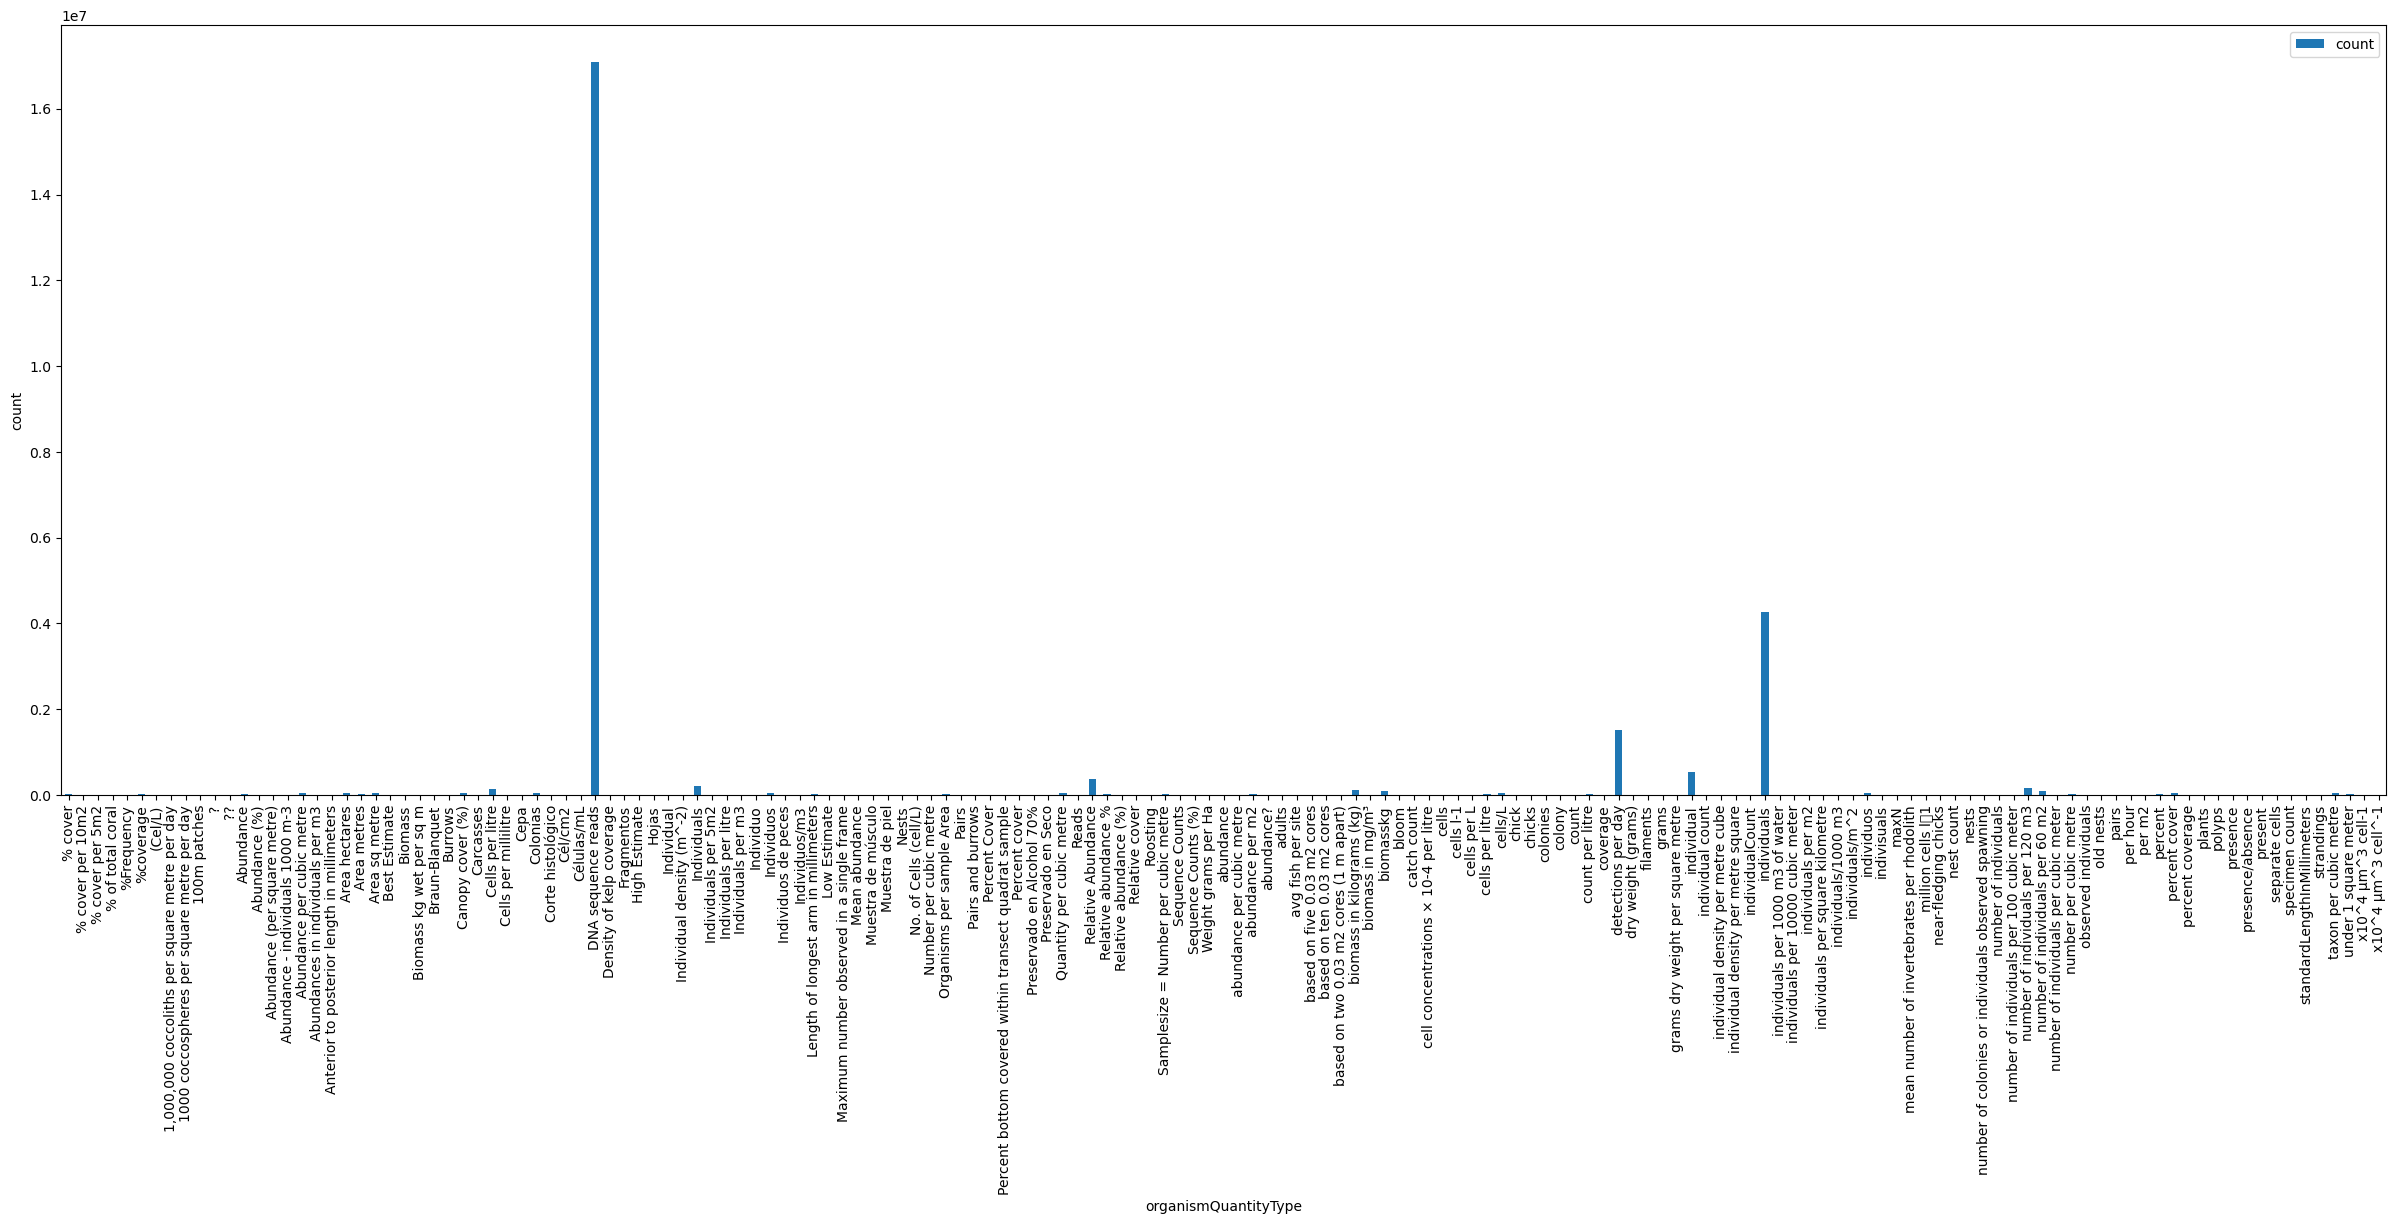

In [56]:
df_group.reset_index(inplace=True)

df_group.plot.bar(x='organismQuantityType',y='count',
                                figsize=(30,10),
                                ylabel='count',
                               )

In [59]:
top_20 = df_group.sort_values(by='count', ascending=False).head(20)['organismQuantityType']


df_top_20 = df_group.loc[df_group['organismQuantityType'].isin(top_20)]

df_top_20.sort_values(by='count', ascending=False)

,organismQuantityType,count
36,DNA sequence reads,17099687
116,individuals,4258861
106,detections per day,1510107
111,individual,533275
70,Relative Abundance,374608
43,Individuals,211118
134,number of individuals per 120 m3,153944
29,Cells per litre,132071
88,biomass in kilograms (kg),115079
135,number of individuals per 60 m2,83765


<AxesSubplot:xlabel='organismQuantityType', ylabel='count'>

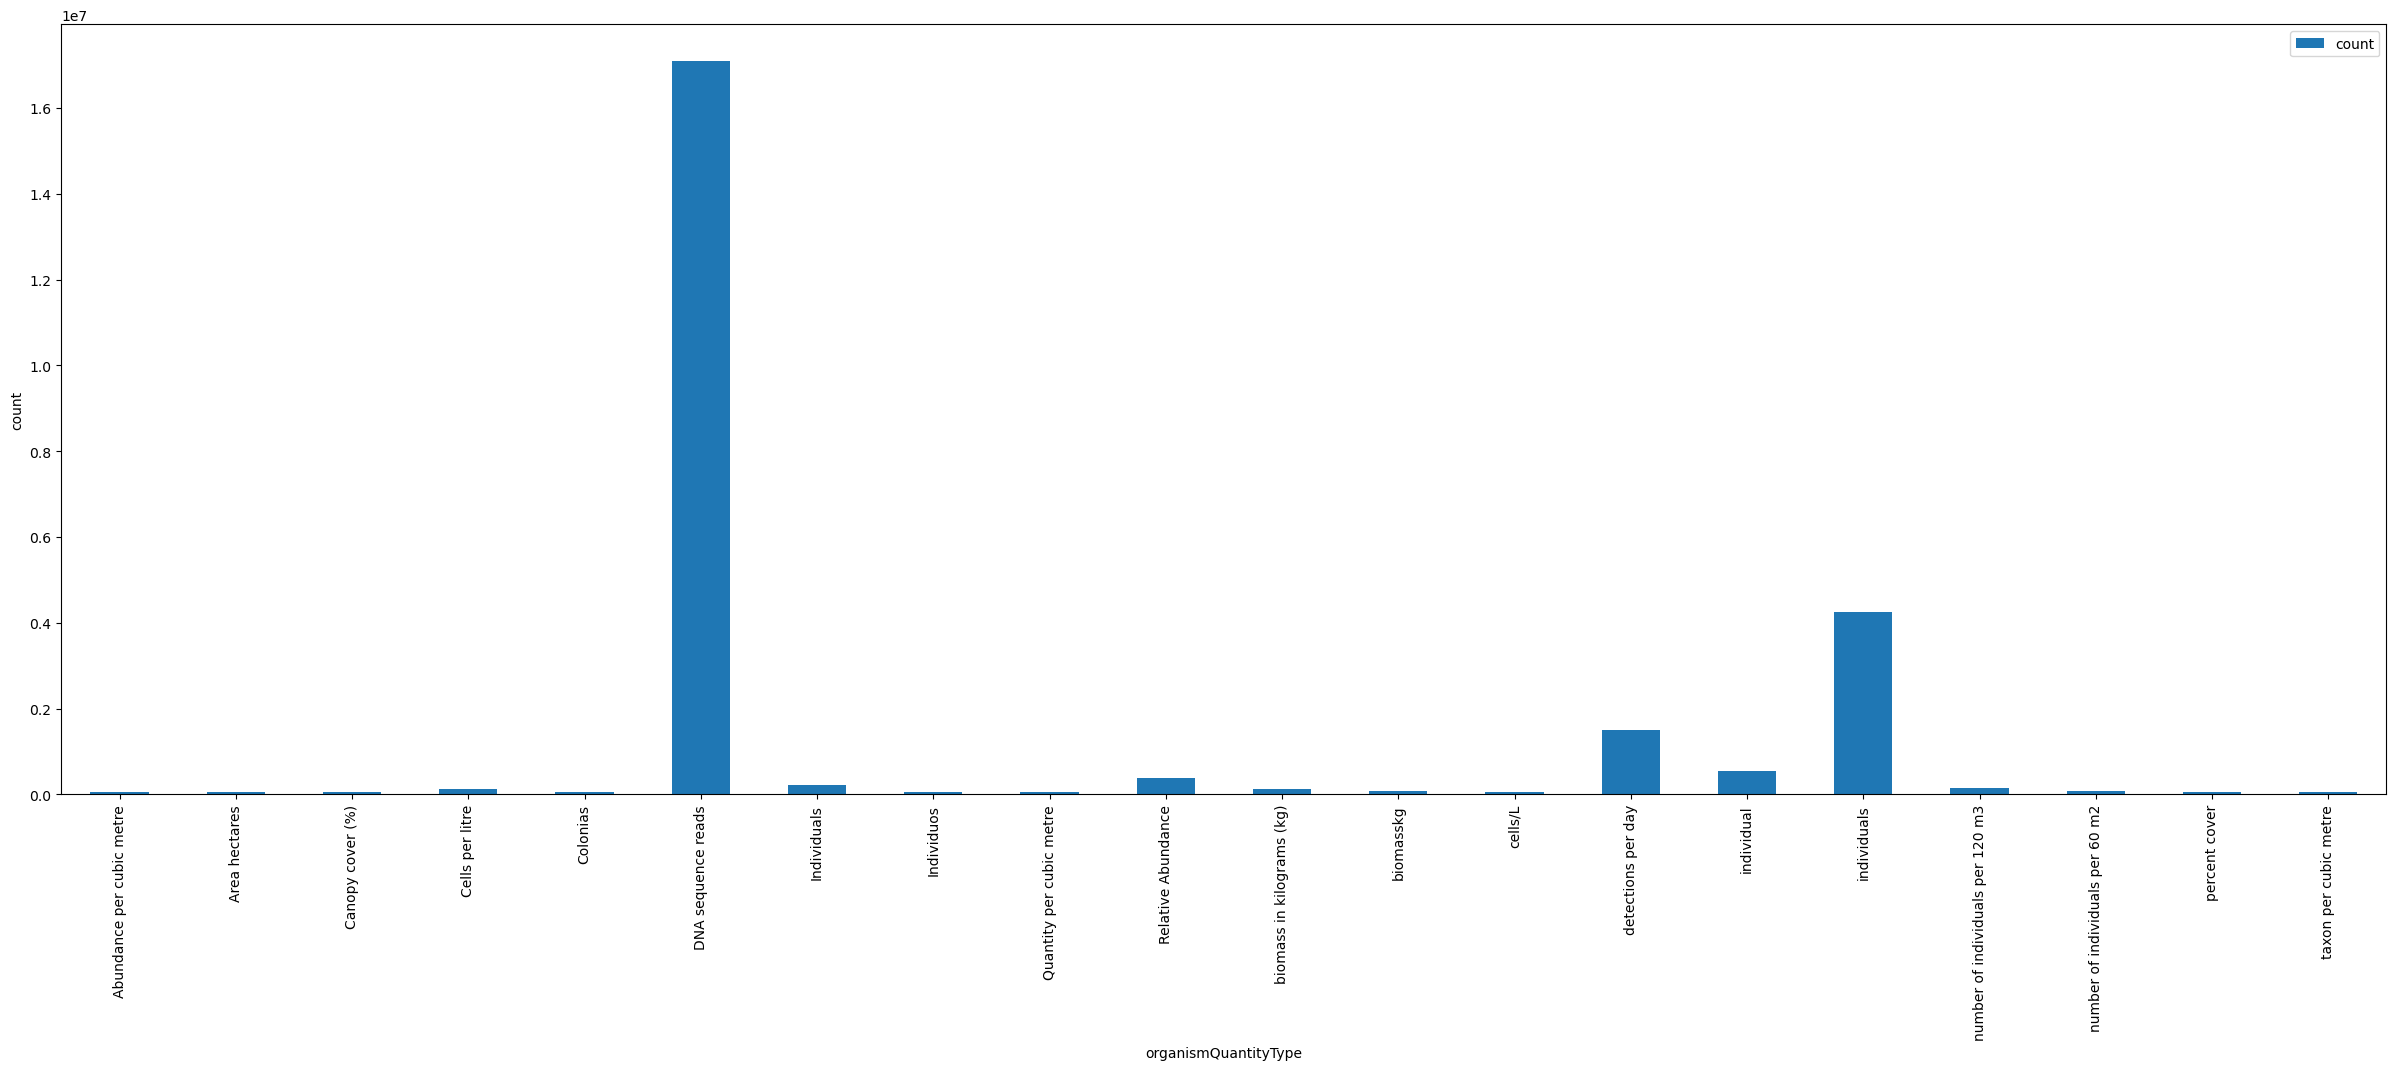

In [60]:
df_top_20.plot.bar(x='organismQuantityType',y='count',
                                figsize=(30,10),
                                ylabel='count',
                               )